Importing Libraries and Loading the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

# Load the dataset
data = pd.read_csv("D:\CoderCave\Covid - 19 project\covid_19_data.csv")
data.head(10)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


Data Preprocessing

In [3]:
# Drop unnecessary column
data.drop(["SNo"], 1, inplace=True)

# Convert "ObservationDate" column to datetime format
data["ObservationDate"] = pd.to_datetime(data["ObservationDate"])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11976\3919683790.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(["SNo"], 1, inplace=True)


Data Aggregation and Exploration

In [4]:
# Group the data by date and aggregate the cases
datewise = data.groupby(["ObservationDate"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})

# Display basic information about the dataset
print("Basic Information")
print("Total number of Confirmed cases around the world", datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world", datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world", datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world", (datewise["Confirmed"].iloc[-1] - datewise["Recovered"].iloc[-1] - datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world", (datewise["Recovered"].iloc[-1] + datewise["Deaths"].iloc[-1]))


Basic Information
Total number of Confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Death cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


Data Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '2020-01-22'),
  Text(1, 0, '2020-01-23'),
  Text(2, 0, '2020-01-24'),
  Text(3, 0, '2020-01-25'),
  Text(4, 0, '2020-01-26'),
  Text(5, 0, '2020-01-27'),
  Text(6, 0, '2020-01-28'),
  Text(7, 0, '2020-01-29'),
  Text(8, 0, '2020-01-30'),
  Text(9, 0, '2020-01-31'),
  Text(10, 0, '2020-02-01'),
  Text(11, 0, '2020-02-02'),
  Text(12, 0, '2020-02-03'),
  Text(13, 0, '2020-02-04'),
  Text(14, 0, '2020-02-05'),
  Text(15, 0, '2020-02-06'),
  Text(16, 0, '2020-02-07'),
  Text(17, 0, '2020-02-08'),
  Text(18, 0, '2020-02-09'),
  Text(19, 0, '2020-02-10'),
  Te

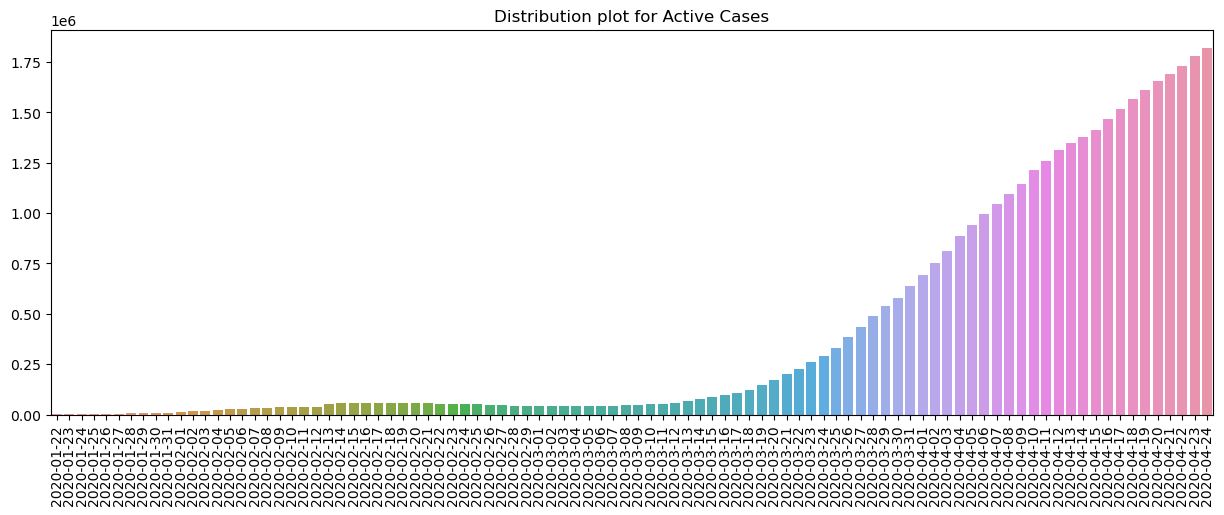

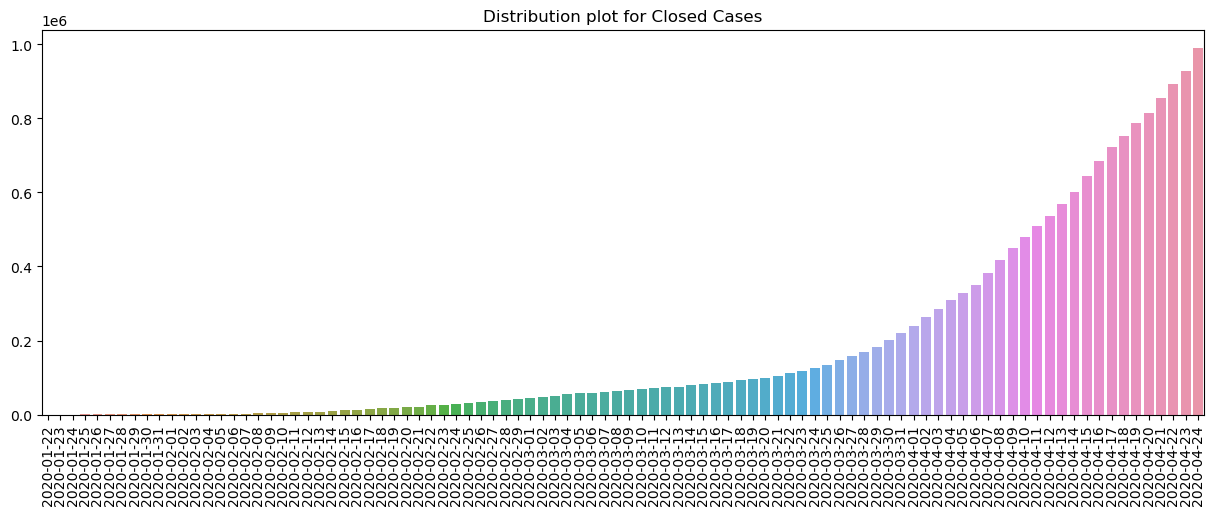

In [5]:
# Plot distribution of active cases over time
plt.figure(figsize=(15, 5))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"] - datewise["Recovered"] - datewise["Deaths"])
plt.title("Distribution plot for Active Cases")
plt.xticks(rotation=90)

# Plot distribution of closed cases over time
plt.figure(figsize=(15, 5))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"] + datewise["Deaths"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)


Weekly Progress of Cases

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11976\1272509891.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  datewise["WeekofYear"] = datewise.index.weekofyear


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

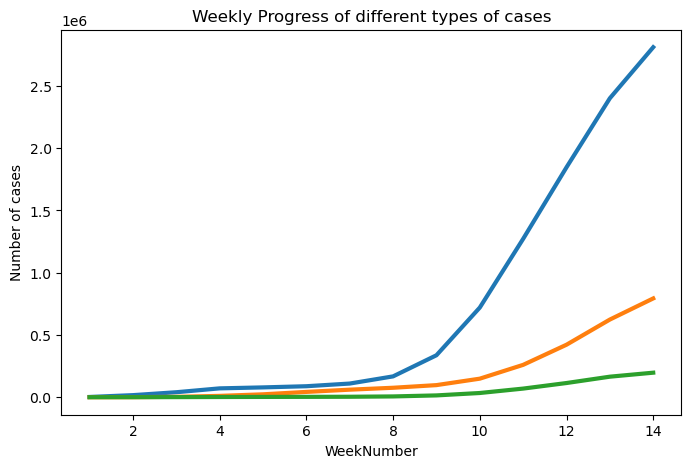

In [6]:
# Add week of year information to the dataset
datewise["WeekofYear"] = datewise.index.weekofyear

# Calculate weekly progress of cases
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w = w + 1

# Plot weekly progress of cases
plt.figure(figsize=(8, 5))
plt.plot(week_num, weekwise_confirmed, linewidth=3)
plt.plot(week_num, weekwise_recovered, linewidth=3)
plt.plot(week_num, weekwise_deaths, linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")


 Country-Wise Analysis

Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

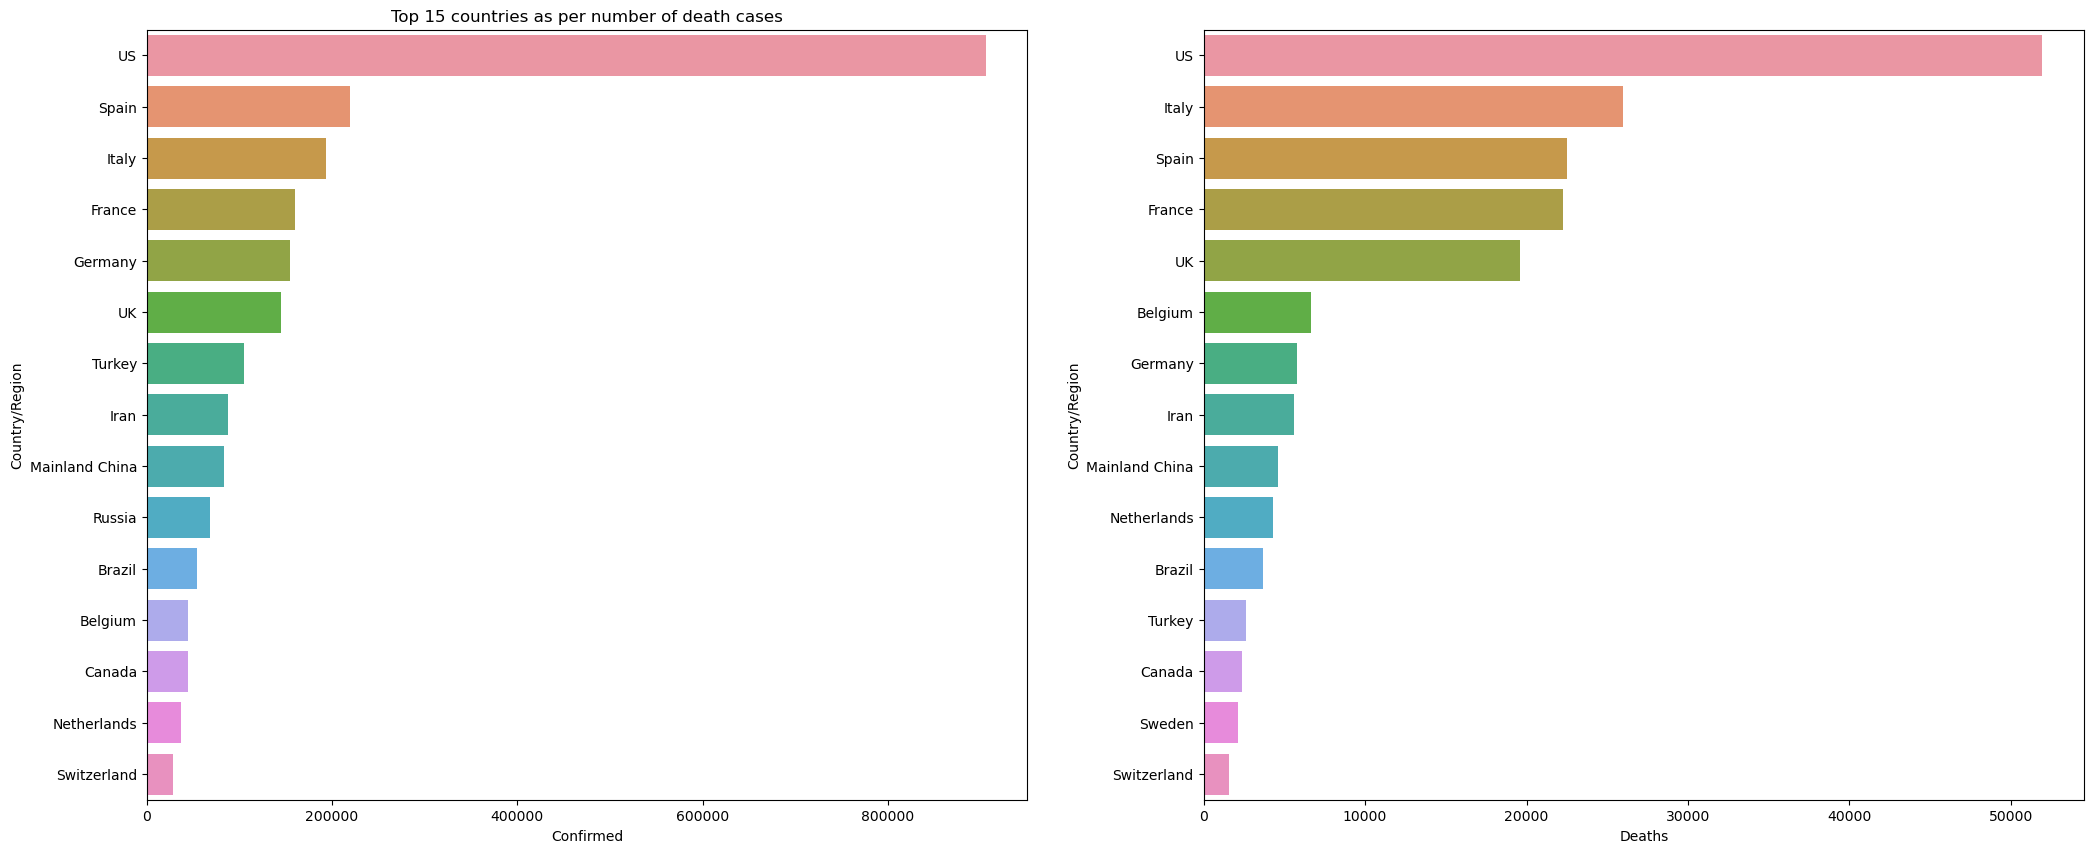

In [7]:
# Perform country-wise analysis
countrywise = data[data["ObservationDate"]==data["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"}).sort_values(["Confirmed"], ascending=False)
countrywise["Mortality"] = (countrywise["Deaths"] / countrywise["Recovered"]) * 100
countrywise["Recovered"] = (countrywise["Recovered"] / countrywise["Confirmed"]) * 100

# Plot top 15 countries by confirmed cases and death cases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
top_15confirmed = countrywise.sort_values(["Confirmed"], ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"], ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"], y=top_15confirmed.index, ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"], y=top_15deaths.index, ax=ax2)
ax1.set_title("Top 15 countries as per number of death cases")


Analysis for Specific Countries

In [8]:
# Analyze data for India
india_data = data[data["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases", datewise_india["Confirmed"].iloc[-1] - datewise_india["Recovered"].iloc[-1] - datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases", datewise_india["Recovered"].iloc[-1] + datewise_india["Deaths"].iloc[-1])

# Analyze data for US
us_data = data[data["Country/Region"]=="US"]
datewise_us = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total Active Cases", datewise_us["Confirmed"].iloc[-1] - datewise_us["Recovered"].iloc[-1] - datewise_us["Deaths"].iloc[-1])
print("Total Closed Cases", datewise_us["Recovered"].iloc[-1] + datewise_us["Deaths"].iloc[-1])


Confirmed   24530
Recovered    5498
Deaths        780
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 18252.0
Total Closed Cases 6278.0
Confirmed   905333
Recovered    99079
Deaths       51949
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 754305.0
Total Closed Cases 151028.0


Time-Series Modeling with Linear Regression and SVR

In [9]:
# Add "Days Since" information to the dataset
datewise["Days Since"] = datewise.index - datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days

# Split the data into train and validation sets
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

# Perform linear regression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1), np.array(train_ml["Confirmed"]).reshape(-1,1))
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

# Perform support vector regression
svm = SVR(C=1, degree=5, kernel='poly', epsilon=0.001)
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1), np.array(train_ml["Confirmed"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generating Predictions

In [10]:
# Generate new predictions using linear regression and support vector regression models
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1, 18):
    new_date.append(datewise.index[-1] + timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format", lambda x: '%.f' % x)
model_predictions = pd.DataFrame(zip(new_date, new_prediction_lr, new_prediction_svm), columns=["Dates", "LR", "SVR"])
model_predictions.head(5)


,Dates,LR,SVR
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245


Holt's Linear Model Prediction

In [11]:
# Perform Holt's linear model prediction
model_train = datewise.iloc[:int(datewise.shape[0]*0.85)]
valid = datewise.iloc[int(datewise.shape[0]*0.85):]
holt = Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4, smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"] = holt.forecast(len(valid))

# Generate new predictions using Holt's linear model
holt_new_date=[]
holt_new_prediction=[]
for i in range(1, 18):
   holt_new_date.append(datewise.index[-1] + timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

# Add Holt's linear model predictions to the dataframe
model_predictions["Holts Linear Model Prediction"] = holt_new_prediction
model_predictions.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11976\969572431.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt = Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4, smoothing_slope=0.2)


,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-04-25,1560529,3322586,2855246
1,2020-04-26,1582219,3500761,2933902
2,2020-04-27,1603909,3686599,3012558
3,2020-04-28,1625599,3880344,3091214
4,2020-04-29,1647289,4082245,3169870
